In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/CSV"

Mounted at /content/drive
'01. Total Gameing.csv'    '03. A_S Gaming.csv'     05.-Desi-Gamers.csv
'01.Total Gameing_M.csv'   '03. A_S Gaming_M.csv'   05.-Desi-Gamers_M.csv
'02. Techno Gamerz.csv'    '04. Levinho.csv'	    06.-Gyan-Gaming.csv
'02. Techno Gamerz_M.csv'  '04. Levinho_M.csv'	    06.-Gyan-Gaming_M.csv


In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 2.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
!ls "/content/drive/My Drive/CSV"

'01. Total Gameing.csv'   '03. A_S Gaming.csv'	 06.-Gyan-Gaming.csv
'01.Total Gameing_M.csv'  '04. Levinho.csv'
'02. Techno Gamerz.csv'    05.-Desi-Gamers.csv


In [ ]:
file_TotalGameing = "/content/drive/My Drive/CSV/01.Total Gameing_M.csv"
data = pd.read_csv(file_TotalGameing)

In [ ]:
data.head()

,author_name,comment,date,like_counts,reply_count,vidid
0,Y23 P05,Ajjubhai challenge for you custom card,2021-04-04T18:07:09Z,0,0,NFlpZL7_rNo
1,NaN,Please 😭😭😭😭🙏🙏🙏,2021-04-04T18:02:27Z,0,0,NFlpZL7_rNo
2,Madhu Soni,Please 😭😭😭😭😭😭😭😭😭😭,2021-04-04T17:53:58Z,0,0,NFlpZL7_rNo
3,HAKER ANDROID GAMERZ,Op,2021-04-04T17:51:04Z,1,0,NFlpZL7_rNo
4,Nitin Mishra,Hii,2021-04-04T17:50:55Z,0,0,NFlpZL7_rNo


In [ ]:
data.shape

(2074, 6)

In [ ]:
data['polarity'] = data['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
data.head()

,author_name,comment,date,like_counts,reply_count,vidid,polarity
0,Y23 P05,Ajjubhai challenge for you custom card,2021-04-04T18:07:09Z,0,0,NFlpZL7_rNo,0.0
1,NaN,Please 😭😭😭😭🙏🙏🙏,2021-04-04T18:02:27Z,0,0,NFlpZL7_rNo,0.0
2,Madhu Soni,Please 😭😭😭😭😭😭😭😭😭😭,2021-04-04T17:53:58Z,0,0,NFlpZL7_rNo,0.0
3,HAKER ANDROID GAMERZ,Op,2021-04-04T17:51:04Z,1,0,NFlpZL7_rNo,0.0
4,Nitin Mishra,Hii,2021-04-04T17:50:55Z,0,0,NFlpZL7_rNo,0.0


**Shuffle the dataset**

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data['pol_cat']  = 0

In [ ]:
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1

In [ ]:
data.head()

,author_name,comment,date,like_counts,reply_count,vidid,polarity,pol_cat
0,HITANSHU FF,Mota bhai raid me maja aagaya,2021-04-04T08:04:42Z,2,1,NFlpZL7_rNo,0.0,-1
1,manjinder singh,hi,2021-04-04T08:05:04Z,0,0,NFlpZL7_rNo,0.0,-1
2,Vishesh Kumar,Bhai face reveal karo bhai,2021-04-04T11:22:50Z,0,0,NFlpZL7_rNo,0.0,-1
3,Jag Mohan,Ajju bhai opp,2021-04-04T08:05:41Z,0,0,NFlpZL7_rNo,0.0,-1
4,Many Times Gamer,Thanks for massage me on instagram,2021-04-04T08:05:03Z,1,0,NFlpZL7_rNo,0.2,1


In [ ]:
data['pol_cat'].value_counts()

-1    1714
 1     360
Name: pol_cat, dtype: int64

In [ ]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

#data_neutral = data[data['pol_cat'] == 0]
#data_neutral = data_neutral.reset_index(drop = True)


In [ ]:
data_pos.head()

,author_name,comment,date,like_counts,reply_count,vidid,polarity,pol_cat,stop_comments
0,Many Times Gamer,thanks for massage me on instagram,2021-04-04T08:05:03Z,1,0,NFlpZL7_rNo,0.2,1,thanks massage instagram
1,S k p Pandey,i love ajjubhai94,2021-04-04T08:13:20Z,0,0,NFlpZL7_rNo,0.5,1,love ajjubhai94
2,THE Tsar,yes rcb win,2021-04-04T08:21:49Z,0,0,NFlpZL7_rNo,0.8,1,yes rcb win
3,Sanjay Kadam,rcd win,2021-04-04T09:43:46Z,0,0,NFlpZL7_rNo,0.8,1,rcd win
4,sangeeta mahale,good morning ajuubhai,2021-04-04T14:34:01Z,1,0,NFlpZL7_rNo,0.7,1,good morning ajuubhai


In [ ]:
data_neg.head()

,author_name,comment,date,like_counts,reply_count,vidid,polarity,pol_cat,stop_comments
0,HITANSHU FF,mota bhai raid me maja aagaya,2021-04-04T08:04:42Z,2,1,NFlpZL7_rNo,0.0,-1,mota bhai raid maja aagaya
1,manjinder singh,hi,2021-04-04T08:05:04Z,0,0,NFlpZL7_rNo,0.0,-1,hi
2,Vishesh Kumar,bhai face reveal karo bhai,2021-04-04T11:22:50Z,0,0,NFlpZL7_rNo,0.0,-1,bhai face reveal karo bhai
3,Jag Mohan,ajju bhai opp,2021-04-04T08:05:41Z,0,0,NFlpZL7_rNo,0.0,-1,ajju bhai opp
4,darbar suresh,mai ne apko follo bhi kiya hai,2021-04-04T17:00:01Z,1,0,NFlpZL7_rNo,0.0,-1,mai ne apko follo bhi kiya hai


In [ ]:
data_neg['comment'][40]

'mota bhai read'

-1    1714
 1     360
Name: pol_cat, dtype: int64

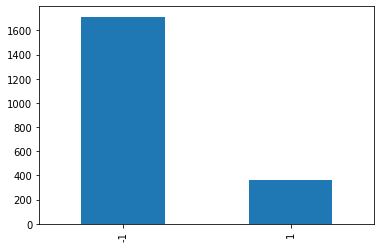

In [ ]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

**Data Preprocessing**

In [ ]:
data['comment'] = data['comment'].str.lower()

In [ ]:
data['comment'].head()

0         mota bhai raid me maja aagaya
1                                    hi
2            bhai face reveal karo bhai
3                         ajju bhai opp
4    thanks for massage me on instagram
Name: comment, dtype: object

In [ ]:
data.describe()

,like_counts,reply_count,polarity,pol_cat
count,2074.000000,2074.000000,2074.000000,2074.000000
mean,0.795564,0.088717,0.071559,-0.652845
std,3.937850,0.626507,0.262280,0.757674
min,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,-1.000000
75%,1.000000,0.000000,0.000000,-1.000000
max,96.000000,16.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   author_name  2073 non-null   object 
 1   comment      2074 non-null   object 
 2   date         2074 non-null   object 
 3   like_counts  2074 non-null   int64  
 4   reply_count  2074 non-null   int64  
 5   vidid        2074 non-null   object 
 6   polarity     2074 non-null   float64
 7   pol_cat      2074 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 129.8+ KB


In [ ]:
data['comment'][0]

'mota bhai raid me maja aagaya'

In [ ]:
data['comment'][0].strip()

'mota bhai raid me maja aagaya'

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
data['comment'] = data['comment'].str.strip()

In [ ]:
train = data.copy()

In [ ]:
train['comment'] = train['comment'].str.strip()

In [ ]:
train['comment'][0]

'mota bhai raid me maja aagaya'

In [ ]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [ ]:
data['stop_comments'] = data['comment'].apply(lambda x : remove_stopwords(x))

In [ ]:
data.head()

,author_name,comment,date,like_counts,reply_count,vidid,polarity,pol_cat,stop_comments
0,HITANSHU FF,mota bhai raid me maja aagaya,2021-04-04T08:04:42Z,2,1,NFlpZL7_rNo,0.0,-1,mota bhai raid maja aagaya
1,manjinder singh,hi,2021-04-04T08:05:04Z,0,0,NFlpZL7_rNo,0.0,-1,hi
2,Vishesh Kumar,bhai face reveal karo bhai,2021-04-04T11:22:50Z,0,0,NFlpZL7_rNo,0.0,-1,bhai face reveal karo bhai
3,Jag Mohan,ajju bhai opp,2021-04-04T08:05:41Z,0,0,NFlpZL7_rNo,0.0,-1,ajju bhai opp
4,Many Times Gamer,thanks for massage me on instagram,2021-04-04T08:05:03Z,1,0,NFlpZL7_rNo,0.2,1,thanks massage instagram


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [ ]:
X_train.shape

(1659,)

In [ ]:
X_test.shape

(415,)

In [ ]:
data['pol_cat'].value_counts()

-1    1714
 1     360
Name: pol_cat, dtype: int64

**Logistic Regression**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [ ]:
tf_train.shape

(1659, 1856)

**Print the Vocabulary**

In [ ]:
print(vect.vocabulary_)

{'like': 1074, 'game': 676, 'play': 1347, 'please': 1350, 'give': 702, 'elit': 610, 'pass': 1319, 'ajju': 213, 'bhai': 357, 'ka': 898, 'face': 630, 'first': 653, 'comment': 482, 'stream': 1549, 'href': 813, 'https': 814, 'www': 1721, 'youtube': 1737, 'com': 478, 'watch': 1701, 'nflpzl7_rno': 1228, 'amp': 252, '56m52s': 120, '56': 118, '52': 115, 'ಸಲ': 1838, 'ಕಪ': 1836, 'ನಮ': 1837, 'ajjy': 227, 'bhi': 373, 'apka': 262, 'saad': 1448, 'khadana': 965, 'jata': 869, 'ho': 801, 'congrats': 487, 'everyone': 624, 'early': 605, 'found': 658, 'samreetkaur1': 1470, 'custom': 509, '5m00s': 121, '00': 0, 'hii': 786, 'reveal': 1421, 'kardo': 919, 'aaju': 155, 'guys': 727, 'abhi': 176, '305': 91, 'subscribers': 1559, 'hue': 817, 'ab': 171, 'jaldi': 862, 'se': 1494, '400': 104, 'karwado': 938, 'op': 1271, 'good': 710, 'morning': 1182, 'ap': 259, 'mera': 1151, 'name': 1214, 'bolo': 395, 'yar': 1727, 'love': 1095, 'rcb': 1402, 'sapurt': 1474, 'bai': 311, 'aja': 204, 'vs': 1690, 'hay': 763, 'apko': 265, '

In [ ]:
vocab = vect.vocabulary_

In [ ]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key

**Accuracy score on training dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

In [ ]:
lr.score(tf_train,y_train)

0.9843279083785413

**Accuracy score on test dataset i.e got from the splitting**

In [ ]:
lr.score(tf_test,y_test)

0.9614457831325302

**Make predictions on the test dataset i.e. unseen data to the model**

In [ ]:
expected = y_test
predicted = lr.predict(tf_test)

**plot confusion matrix for the test dataset**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install mlxtend

[[ 46  14]
 [  2 353]]


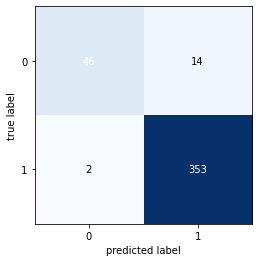

In [ ]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)

## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       352
           1       0.93      0.81      0.86        63

    accuracy                           0.96       415
   macro avg       0.95      0.90      0.92       415
weighted avg       0.96      0.96      0.96       415



**find the F1 score**

In [ ]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.9209674347743286